In [16]:
library(Synth)
library(LowRankQP)
library(conflicted)
library(dplyr)
library(rvest)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(viridis)
library(hrbrthemes)
library(googlesheets4)
library(skimr)
library(kableExtra)
library(ggthemes)
library(stargazer)
library(kableExtra)

In [36]:
link <- "https://docs.google.com/spreadsheets/d/e/2PACX-1vTsUxGLz9-i1lUCS9-CHBO8NmNQwRJ_t91zA3VU4Yi3q8gk29LTywBOQX90E36ufFDLrFV9lxx8d0YA/pub?output=csv"
data <- read.csv(link, header=TRUE)
head(data)

,year,state_num,state_abbr,state_name,total.crimes,population,total_crimes_per_population,violent_crime,violent_crime_per_population,homicide,...,median_household_income,Bodycam_Policy,kills_per_million,treatment,dem_majority,dem_governor,white.population,poc_percentage_population,poc_killed_by_police_percentage,gdp_per_capita
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<dbl>,<chr>,...,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<chr>,<dbl>
1,2013,0,AL,Alabama,365338,4833996,0.07557681,20834,0.004309892,346,...,42849,0,4.35,0,0,0,3437356,0.2889204,76.19047619,40128.60
2,2014,0,AL,Alabama,349628,4846411,0.07214163,20727,0.004276773,276,...,42830,0,3.72,0,0,0,3440563,0.2900802,41.17647059,40661.92
3,2015,0,AL,Alabama,335484,4853875,0.06911674,22957,0.004729623,348,...,44765,0,3.71,0,0,0,3441742,0.2909290,38.88888889,41845.60
4,2016,0,AL,Alabama,338274,4860545,0.06959590,25878,0.005324094,407,...,46257,0,5.14,0,0,0,3445802,0.2910667,28,42963.15
5,2017,0,AL,Alabama,338486,4875120,0.06943132,25469,0.005224282,419,...,48123,0,5.33,0,0,0,3450537,0.2922150,34.61538462,44432.85
6,2018,0,AL,Alabama,328538,4887681,0.06721756,25567,0.005230906,383,...,49861,0,3.27,0,0,0,3457921,0.2925232,35.71428571,46292.67


In [41]:
# Define the treated unit, donor pool, and treated year
treated_unit <- 30

excluded_states <- c("Connecticut", "New Jersey", "Colorado", "Illinois", "Maryland")

donor_pool <- unique(data$state_name[data$state_num != treated_unit & !data$state_name %in% excluded_states])

treated_year <- 2020

dataprep_out <- dataprep(
  foo = data,
  predictors = c("kills_per_million", "gdp_per_capita", "poc_percentage_population", "dem_majority", "dem_governor", "violent_crime_per_population", "homicide_per_population"),  # Review and adjust the predictors
  dependent = "kills_per_million",  # Verify that the outcome variable is correctly specified
  unit.variable = "state_num",  # Verify the variable representing countries/regions
  time.variable = "year",
  treatment.identifier = treated_unit,
  controls.identifier = donor_pool,
  time.predictors.prior = 2013:2020,  # Adjust the time range for the placebo test
  time.optimize.ssr = 2013:2020,  # Adjust the time range for the placebo test
  unit.names.variable = "state_name",
  time.plot = 2013:2023,  # Adjust the time range for the placebo test
)

synth_out <- synth(dataprep_out)


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 4.02956 

solution.v:
 0.4611914 0.06918259 0.07769327 0.08765337 0.009927983 0.03155405 0.2627973 

solution.w:
 5.4e-09 0.3086506 1.4e-08 9.4e-09 4.79e-08 1.34e-08 4e-09 3.4e-09 9.8e-09 2.5e-09 2.9e-09 1.6e-09 3.3e-09 3.2e-09 1.02e-08 3.2e-09 3.4e-09 2.1e-09 4.1e-09 4.4e-09 8.9e-09 8.4e-09 2e-09 1.643e-07 2.7e-09 3.7e-09 2.7e-09 2.1e-09 2.2e-09 0.691349 2.94e-08 2e-09 2.5e-09 4.1e-09 3.5e-09 6.3e-09 3.6e-09 2.8e-09 8.2e-09 1.9e-09 3.17e-08 1.64e-08 2.3e-09 4.1e-09 



In [42]:
print(synth_out)


$solution.v
            kills_per_million gdp_per_capita poc_percentage_population
Nelder-Mead         0.4611914     0.06918259                0.07769327
            dem_majority dem_governor violent_crime_per_population
Nelder-Mead   0.08765337  0.009927983                   0.03155405
            homicide_per_population
Nelder-Mead               0.2627973

$solution.w
       w.weight
0  5.368978e-09
1  3.086506e-01
2  1.401177e-08
3  9.391340e-09
4  4.788216e-08
7  1.344725e-08
8  3.965481e-09
9  3.381333e-09
10 9.770958e-09
11 2.540781e-09
13 2.890241e-09
14 1.609558e-09
15 3.316591e-09
16 3.202120e-09
17 1.019579e-08
18 3.156126e-09
20 3.361166e-09
21 2.112919e-09
22 4.103513e-09
23 4.430937e-09
24 8.945056e-09
25 8.419134e-09
26 2.003230e-09
27 1.643193e-07
28 2.691559e-09
31 3.683843e-09
32 2.703941e-09
33 2.081506e-09
34 2.188680e-09
35 6.913490e-01
36 2.938506e-08
37 1.961019e-09
38 2.483850e-09
39 4.130139e-09
40 3.455103e-09
41 6.253336e-09
42 3.571480e-09
43 2.844403e-09
44 

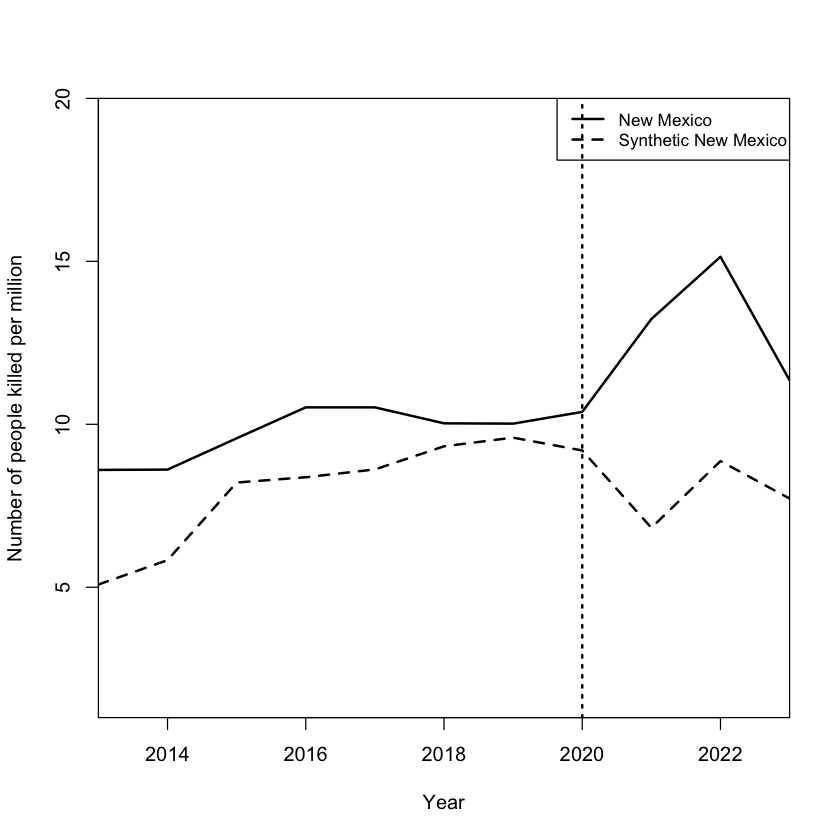

In [43]:
path.plot(synth.res = synth_out,
          dataprep.res = dataprep_out,
          tr.intake = 2020,
          Ylab = "Number of people killed per million",
          Xlab = "Year",
          Legend = c("New Mexico", "Synthetic New Mexico"),
        #   Main = "New Mexico vs Synthetic New Mexico",
          Ylim = c(1,20)
          )


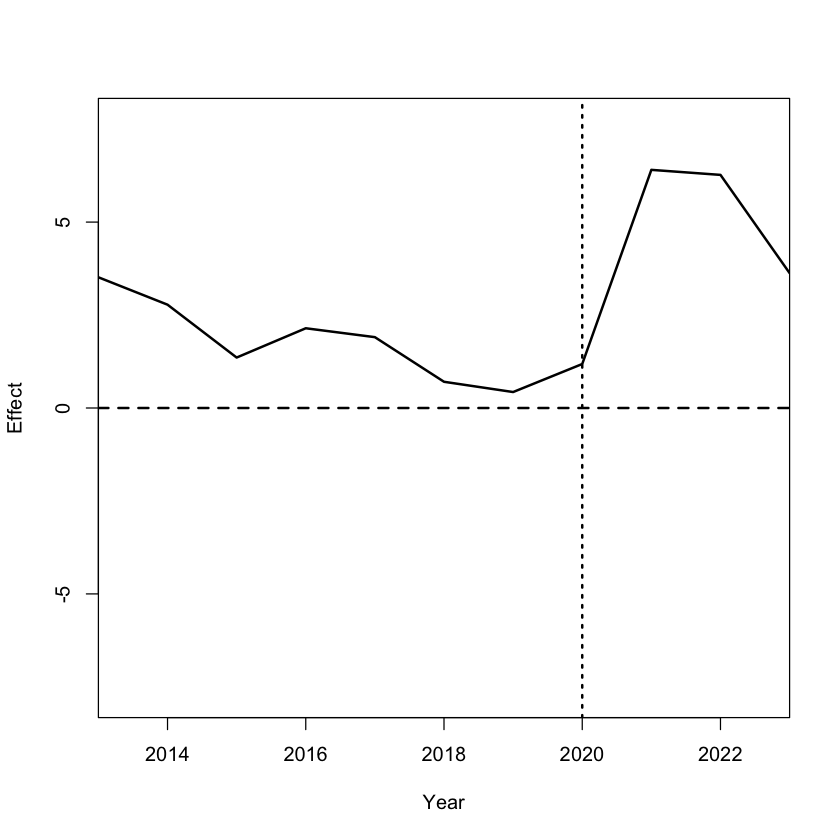

In [44]:
 gaps.plot(synth.res = synth_out,
          dataprep.res = dataprep_out,
          tr.intake = 2020,
          Ylab = "Effect",
          Xlab = "Year",
          Main = c("")
        #   Main = " Gap between number of people killed in New Mexico and its synthetic version")
 )

In [47]:
# Define the treated unit, donor pool, and treated year
treated_unit <- 30

excluded_states <- c("Connecticut", "New Jersey", "Colorado", "Illinois", "Maryland")

donor_pool <- unique(data$state_name[data$state_num != treated_unit & !data$state_name %in% excluded_states])

treated_year <- 2016

dataprep_out_placebo <- dataprep(
  foo = data,
  predictors = c("kills_per_million", "gdp_per_capita", "poc_percentage_population", "dem_majority", "dem_governor", "violent_crime_per_population", "homicide_per_population"),  # Review and adjust the predictors
  dependent = "kills_per_million",  # Verify that the outcome variable is correctly specified
  unit.variable = "state_num",  # Verify the variable representing countries/regions
  time.variable = "year",
  treatment.identifier = treated_unit,
  controls.identifier = donor_pool,
  time.predictors.prior = 2013:2016,  # Adjust the time range for the placebo test
  time.optimize.ssr = 2013:2016,  # Adjust the time range for the placebo test
  unit.names.variable = "state_name",
  time.plot = 2013:2023,  # Adjust the time range for the placebo test
)

synth_out_placebo <- synth(dataprep_out_placebo)


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 4.68799 

solution.v:
 0.2607507 0.3028809 0.255303 0.04836752 0.006827001 0.01902998 0.1068409 

solution.w:
 2e-09 5e-09 0.4072804 1.8e-09 1.24e-08 3.4e-09 1.9e-09 1.5e-09 2.6e-09 9e-10 1.3e-09 1e-09 1.6e-09 1.3e-09 3.3e-09 9e-10 1.9e-09 1.1e-09 2.6e-09 1.5e-09 2.2e-09 2.7e-09 1.7e-09 8.4e-09 2.2e-09 1.7e-09 1.4e-09 9e-10 1.2e-09 0.5927195 6.4e-09 1.1e-09 1.7e-09 1.8e-09 2e-09 1.9e-09 1.9e-09 1.4e-09 2.1e-09 1e-09 5.8e-09 5e-10 1.1e-09 2.8e-09 



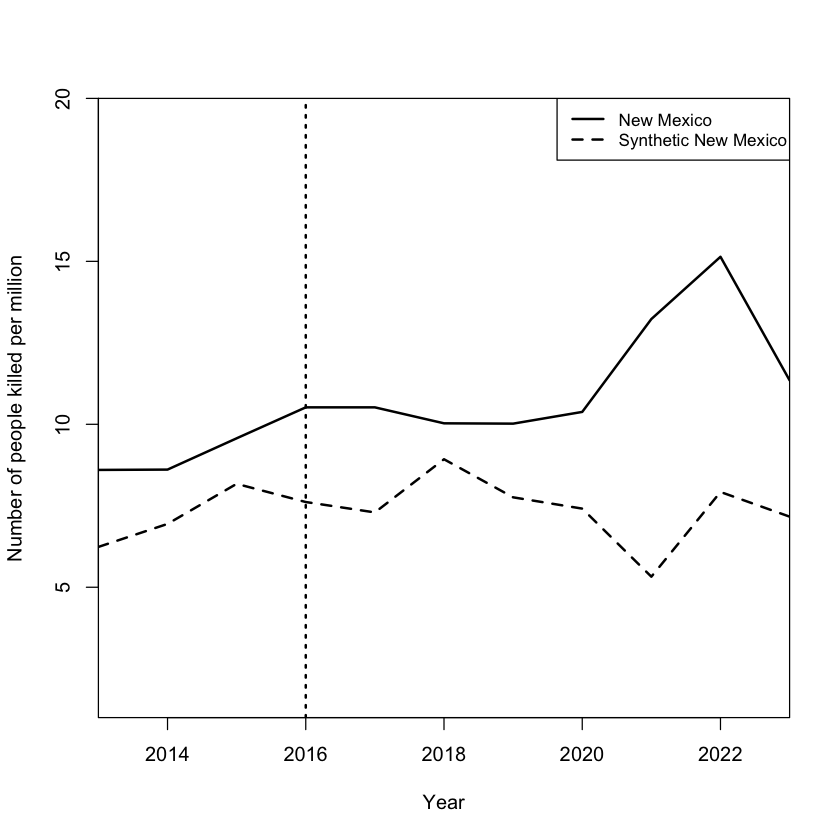

In [50]:
path.plot(synth.res = synth_out_placebo,
          dataprep.res = dataprep_out_placebo,
          tr.intake = 2016,
          Ylab = "Number of people killed per million",
          Xlab = "Year",
          Legend = c("New Mexico", "Synthetic New Mexico"),
        #   Main = "New Mexico vs Synthetic New Mexico",
          Ylim = c(1,20)
          )

In [59]:
gaps <- dataprep_out$Y1plot - (dataprep_out$Y0plot %*% synth_out$solution.w)

donor_weights <- synth_out$solution.w
donor_names <- donor_pool

# Create a data frame with weights, names, and spacing
donor_data <- data.frame(Weights = donor_weights, States = donor_names)

# Use stargazer to display the data frame
library(stargazer)
stargazer(donor_data, type = "text", summary = FALSE)



   w.weight     States    
--------------------------
0     0        Alabama    
1   0.309       Alaska    
2     0        Arizona    
3     0        Arkansas   
4  0.00000    California  
7     0        Delaware   
8     0        Florida    
9     0        Georgia    
10    0         Hawaii    
11    0         Idaho     
13    0        Indiana    
14    0          Iowa     
15    0         Kansas    
16    0        Kentucky   
17    0       Louisiana   
18    0         Maine     
20    0     Massachusetts 
21    0        Michigan   
22    0       Minnesota   
23    0      Mississippi  
24    0        Missouri   
25    0        Montana    
26    0        Nebraska   
27 0.00000      Nevada    
28    0     New Hampshire 
31    0        New York   
32    0     North Carolina
33    0      North Dakota 
34    0          Ohio     
35  0.691      Oklahoma   
36 0.00000      Oregon    
37    0      Pennsylvania 
38    0      Rhode Island 
39    0     South Carolina
40    0      South Dakota 


In [60]:
synth_tables <- synth.tab(dataprep.res = dataprep_out, synth.res = synth_out)

synth_tables[1:3]


$tab.pred
                               Treated Synthetic Sample Mean
kills_per_million                9.781     8.029       3.708
gdp_per_capita               45364.231 56634.263   55909.389
poc_percentage_population        0.154     0.224       0.177
dem_majority                     1.000     0.000       0.261
dem_governor                     1.000     0.000       0.315
violent_crime_per_population     0.007     0.006       0.004
homicide_per_population          0.000     0.000       0.000

$tab.v
                             v.weights
kills_per_million            0.461    
gdp_per_capita               0.069    
poc_percentage_population    0.078    
dem_majority                 0.088    
dem_governor                 0.01     
violent_crime_per_population 0.032    
homicide_per_population      0.263    

$tab.w
   w.weights     unit.names unit.numbers
0      0.000        Alabama            0
1      0.309         Alaska            1
2      0.000        Arizona            2
3      0.000       Arkansas            3
4      0.000     California            4
7      0.000       Delaware            7
8      0.000        Florida            8
9      0.000        Georgia            9
10     0.000         Hawaii           10
11     0.000          Idaho           11
13     0.000        Indiana           13
14     0.000           Iowa           14
15     0.000         Kansas           15
16     0.000       Kentucky           16
17     0.000      Louisiana           17
18     0.000          Maine           18
20     0.000  Massachusetts           20
21     0.000       Michigan           21
22     0.000      Minnesota           22
23     0.000    Mississippi           23
24     0.000       Missouri           24
25     0.000        Montana           25
26     0.000       Nebraska           26
27     0.000         Nevada           27
28     0.000  New Hampshire           28
31     0.000       New York           31
32     0.000 North Carolina           32
33     0.000   North Dakota           33
34     0.000           Ohio           34
35     0.691       Oklahoma           35
36     0.000         Oregon           36
37     0.000   Pennsylvania           37
38     0.000   Rhode Island           38
39     0.000 South Carolina           39
40     0.000   South Dakota           40
41     0.000      Tennessee           41
42     0.000          Texas           42
43     0.000           Utah           43
44     0.000        Vermont           44
45     0.000       Virginia           45
46     0.000     Washington           46
47     0.000  West Virginia           47
48     0.000      Wisconsin           48
49     0.000        Wyoming           49

In [61]:
if (!requireNamespace("remotes", quietly = TRUE)) {
  install.packages("remotes")
}

# Install SCtools package from GitHub
remotes::install_github("bcastanho/SCtools")


Using GitHub PAT from the git credential store.

Skipping install of 'SCtools' from a github remote, the SHA1 (64cdd39a) has not changed since last install.
  Use `force = TRUE` to force installation



In [53]:
library(SCtools)

In [54]:
placebo <- generate.placebos(dataprep_out, synth_out, Sigf.ipop = 2, strategy='multicore')


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 0.7908472 

solution.v:
 0.8688711 1.34387e-05 5.68955e-05 4.03175e-05 4.7754e-06 0.09845717 0.03255628 

solution.w:
 0.07262138 0.007249778 0.01678598 0.01332708 0.01960104 0.01445224 0.01401346 0.01103335 0.009880723 0.01625098 0.01341666 0.01419925 0.01099838 0.3524635 0.009707818 0.01744211 0.03014683 0.01259186 0.01064196 0.01604701 0.008490766 0.01298725 0.01304457 0.01172884 0.01901776 0.01544254 0.0125027 0.01442586 0.003914333 0.01082841 0.0171152 0.01483687 0.02483916 0.01272867 0.03362027 0.01497847 0.01018127 0.01075728 0.01318763 0.01062852 0.009793072 0.01318656 0.008892982 


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 9.455249 

solution.v:
 

New names:
* `w.weight` -> `w.weight...1`
* `w.weight` -> `w.weight...2`
* `w.weight` -> `w.weight...3`
* `w.weight` -> `w.weight...4`
* `w.weight` -> `w.weight...5`
* `w.weight` -> `w.weight...6`
* `w.weight` -> `w.weight...7`
* `w.weight` -> `w.weight...8`
* `w.weight` -> `w.weight...9`
* `w.weight` -> `w.weight...10`
* `w.weight` -> `w.weight...11`
* `w.weight` -> `w.weight...12`
* `w.weight` -> `w.weight...13`
* `w.weight` -> `w.weight...14`
* `w.weight` -> `w.weight...15`
* `w.weight` -> `w.weight...16`
* `w.weight` -> `w.weight...17`
* `w.weight` -> `w.weight...18`
* `w.weight` -> `w.weight...19`
* `w.weight` -> `w.weight...20`
* `w.weight` -> `w.weight...21`
* `w.weight` -> `w.weight...22`
* `w.weight` -> `w.weight...23`
* `w.weight` -> `w.weight...24`
* `w.weight` -> `w.weight...25`
* `w.weight` -> `w.weight...26`
* `w.weight` -> `w.weight...27`
* `w.weight` -> `w.weight...28`
* `w.weight` -> `w.weight...29`
* `w.weight` -> `w.weight...30`
* `w.weight` -> `w.weight...31`
* `w.w

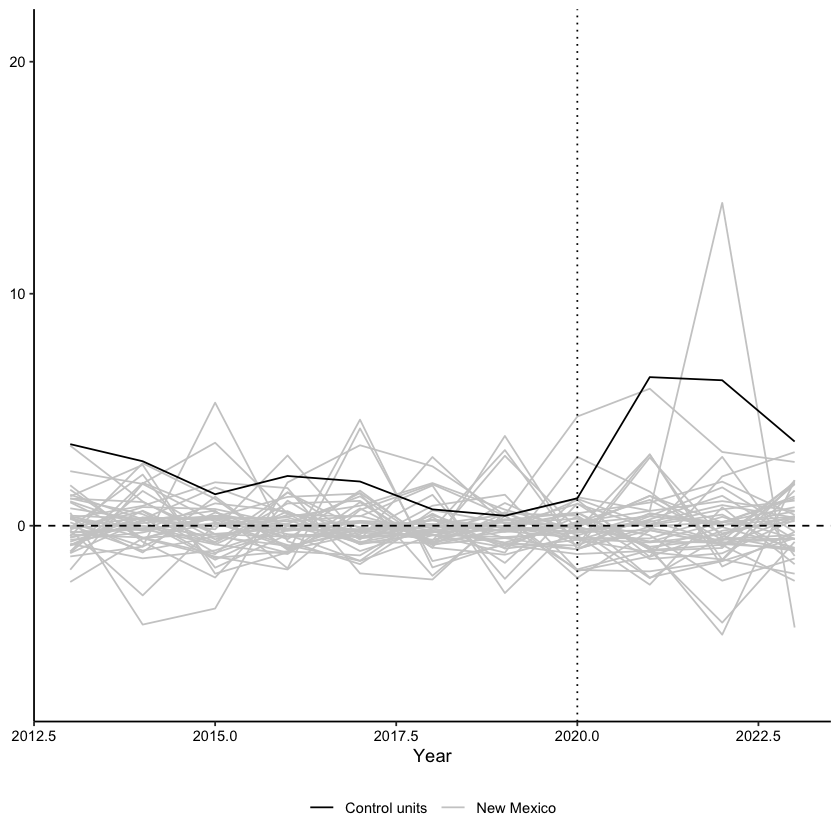

In [55]:
p <- plot_placebos(placebo, discard.extreme=TRUE, mspe.limit=20, xlab='Year')
p

In [56]:
# Calculate the p-value
ratio <- mspe.test(placebo)
print(ratio$p.val)


[1] 0.08888889


In [57]:
print(ratio$test)

   MSPE.ratios           unit
1    0.7861030        Alabama
2    1.8520240         Alaska
3    0.2054780        Arizona
4    1.3622828       Arkansas
5    0.7530074     California
6    0.5217467       Delaware
7    4.8835501        Florida
8    7.7077716        Georgia
9    3.0455693         Hawaii
10   2.9499134          Idaho
11   4.2535848        Indiana
12   2.9277181           Iowa
13   0.1060979         Kansas
14   4.8362446       Kentucky
15   2.0325408      Louisiana
16   0.2003245          Maine
17   5.1297644  Massachusetts
18   1.6885698       Michigan
19  13.4406420      Minnesota
20   1.4337113    Mississippi
21   0.9591542       Missouri
22   0.7452985        Montana
23   1.9168967       Nebraska
24   0.2828112         Nevada
25   0.8586267  New Hampshire
26   1.1148959       New York
27   1.5456090 North Carolina
28   0.2380654   North Dakota
29   3.5410188           Ohio
30   0.5781102       Oklahoma
31   2.2362190         Oregon
32   2.2377809   Pennsylvania
33   0.393

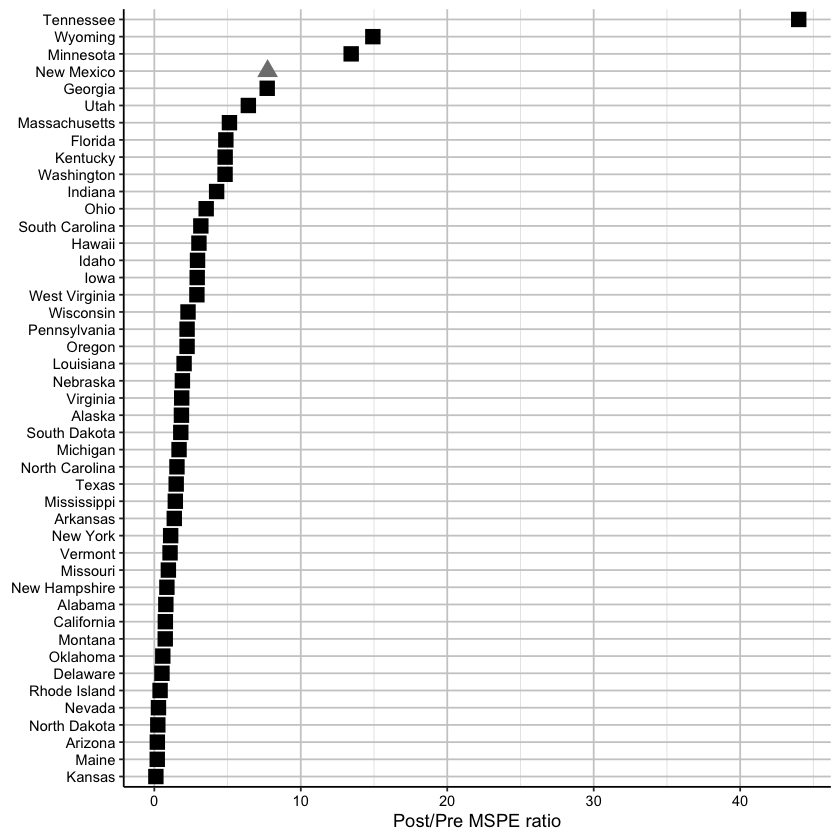

In [58]:
mspe.plot(
  placebo,
  discard.extreme = FALSE,
  mspe.limit = 20,
  plot.hist = FALSE,
  title = NULL,
  xlab = "Post/Pre MSPE ratio",
  ylab = NULL
)